In [ ]:
# Bike Rental Count Prediction

Business Objective : Predict count on number of rental bikes given environmental and climatic conditions
Machine Learning Type: Regression Model


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
df.shape

(731, 16)

In [6]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
df.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

Removing redundant values from the data as we do not use them in analysis

In [8]:
df = df.drop(df.columns[[0, 1, 13, 14]], axis = 1)

In [9]:
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,2114
727,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,3095
728,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,1341
729,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,1796


### EDA and Data Processing

In [10]:
df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [11]:
numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
categorical_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [12]:
numeric_cols

['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [13]:
categorical_cols

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

temp


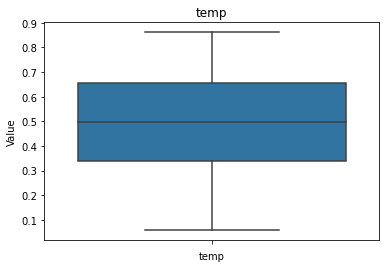

atemp


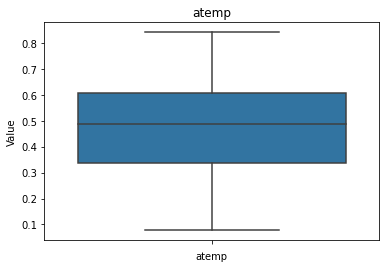

hum


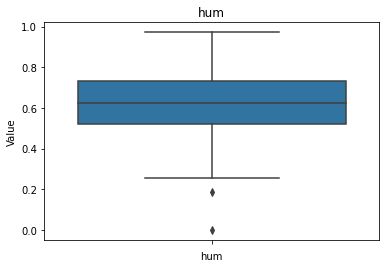

windspeed


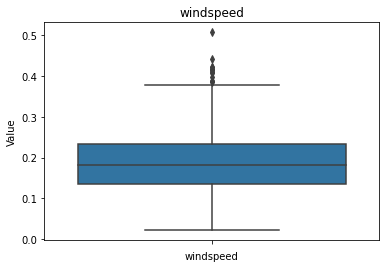

cnt


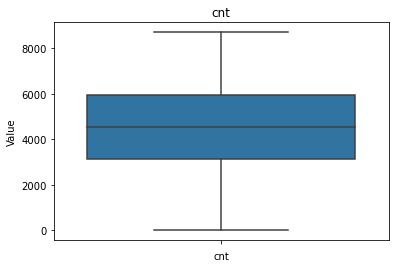

In [14]:
for i in numeric_cols:
    print(i)
    sns.boxplot(y = df[i])
    plt.xlabel(i)
    plt.ylabel("Value")
    plt.title(i)
    plt.show()

In [15]:
#replacing outliners with nan
for i in numeric_cols:
    print(i)
    q75, q25 = np.percentile(df.loc[:,i], [75, 25])
    iqr = q75 - q25
    Innerfence = q25 - (iqr*1.5)
    Upperfence = q75 + (iqr*1.5)
    print("Innerfence= "+str(Innerfence))
    print("Upperfence= "+str(Upperfence)) 
    print("IQR ="+str(iqr))

    df.loc[df[i]<Innerfence, i] = np.nan
    df.loc[df[i]>Upperfence, i] = np.nan

temp
Innerfence= -0.14041600000000015
Upperfence= 1.1329160000000003
IQR =0.3183330000000001
atemp
Innerfence= -0.06829675000000018
Upperfence= 1.0147412500000002
IQR =0.2707595000000001
hum
Innerfence= 0.20468725
Upperfence= 1.0455212500000002
IQR =0.21020850000000002
windspeed
Innerfence= -0.012446750000000034
Upperfence= 0.38061125
IQR =0.0982645
cnt
Innerfence= -1054.0
Upperfence= 10162.0
IQR =2804.0


In [16]:
df['hum'] = df['hum'].fillna(df['hum'].median())
df['windspeed'] = df['windspeed'].fillna(df['windspeed'].median())

In [17]:
df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

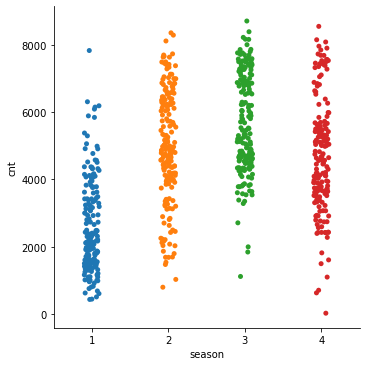

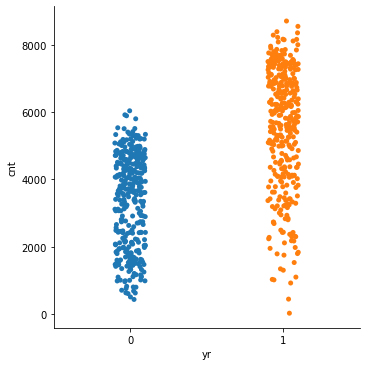

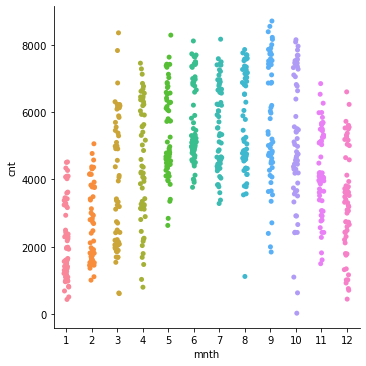

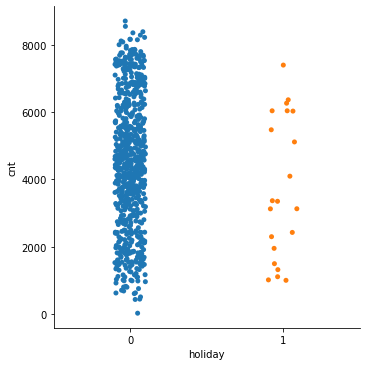

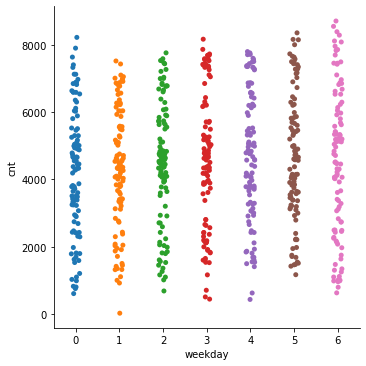

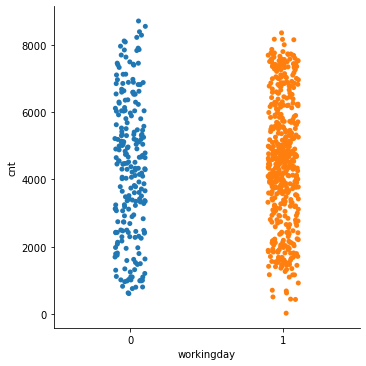

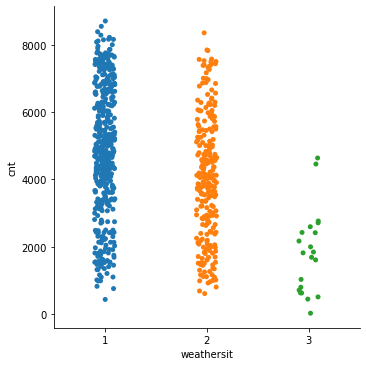

In [18]:
for i in categorical_cols:
    sns.catplot(x = i, y = "cnt", data=df)

Text(0.5, 0, 'Windspeed')

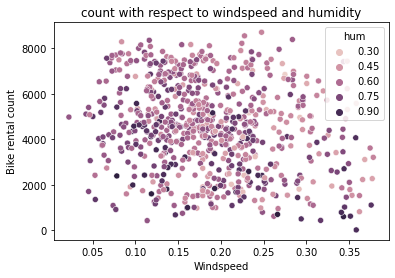

In [19]:
scatter_plot1 = sns.scatterplot(x="windspeed", y="cnt", hue="hum", data= df)

plt.title("count with respect to windspeed and humidity")
plt.ylabel("Bike rental count")
plt.xlabel("Windspeed")

Text(0.5, 0, 'Weekdays')

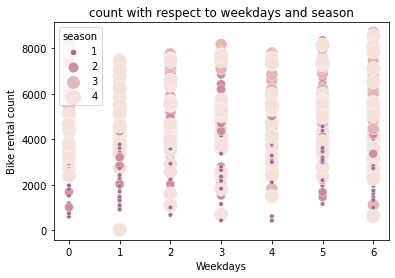

In [20]:
cmap = sns.cubehelix_palette(dark=.9, light=.5, as_cmap=True)

scatter_plot2 = sns.scatterplot(x="weekday", y="cnt",
            hue="season", size="season", sizes = (20, 200), palette=cmap, data= df)

plt.title("count with respect to weekdays and season")
plt.ylabel("Bike rental count")
plt.xlabel("Weekdays")

Text(0.5, 0, 'Temperature')

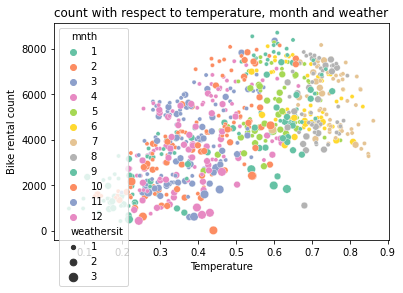

In [21]:
cmap2 = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)

scatter_plot3 = sns.scatterplot(x="temp", y="cnt", hue="mnth", size="weathersit", palette="Set2", data=df)

plt.title("count with respect to temperature, month and weather")
plt.ylabel("Bike rental count")
plt.xlabel("Temperature")

Text(0.5, 0, 'Month')

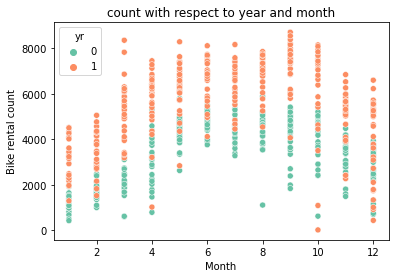

In [22]:
cmap3 = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)

scatter_plot4 = sns.scatterplot(x="mnth", y="cnt", hue="yr", palette="Set2", data= df)

plt.title("count with respect to year and month")
plt.ylabel("Bike rental count")
plt.xlabel("Month")


### Feature Engineering

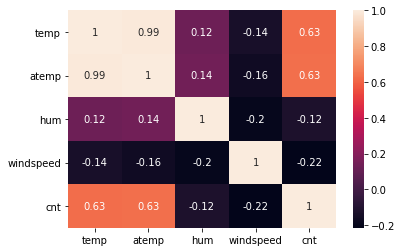

In [23]:
Data_Day_cor = df.loc[:, numeric_cols]
cor = Data_Day_cor.corr()
heatmap = sns.heatmap(cor, annot=True)

In [24]:
# Anova Test

import statsmodels.api as sm
from statsmodels.formula.api import ols

for i in categorical_cols:
    mod = ols('cnt' + '~' + i, data = df).fit()
    anova_table = sm.stats.anova_lm(mod, typ = 2)
    print(anova_table)

                sum_sq     df           F        PR(>F)
season    4.517974e+08    1.0  143.967653  2.133997e-30
Residual  2.287738e+09  729.0         NaN           NaN
                sum_sq     df           F        PR(>F)
yr        8.798289e+08    1.0  344.890586  2.483540e-63
Residual  1.859706e+09  729.0         NaN           NaN
                sum_sq     df          F        PR(>F)
mnth      2.147445e+08    1.0  62.004625  1.243112e-14
Residual  2.524791e+09  729.0        NaN           NaN
                sum_sq     df         F    PR(>F)
holiday   1.279749e+07    1.0  3.421441  0.064759
Residual  2.726738e+09  729.0       NaN       NaN
                sum_sq     df         F    PR(>F)
weekday   1.246109e+07    1.0  3.331091  0.068391
Residual  2.727074e+09  729.0       NaN       NaN
                  sum_sq     df         F    PR(>F)
workingday  1.024604e+07    1.0  2.736742  0.098495
Residual    2.729289e+09  729.0       NaN       NaN
                  sum_sq     df          F 

In [25]:
df = df.drop(['atemp', 'holiday', 'weekday', 'workingday'], axis = 1)


In [31]:
df

,season,yr,mnth,weathersit,temp,hum,windspeed,cnt
0,1,0,1,2,0.344167,0.805833,0.160446,985.0
1,1,0,1,2,0.363478,0.696087,0.248539,801.0
2,1,0,1,1,0.196364,0.437273,0.248309,1349.0
3,1,0,1,1,0.200000,0.590435,0.160296,1562.0
4,1,0,1,1,0.226957,0.436957,0.186900,1600.0
...,...,...,...,...,...,...,...,...
726,1,1,12,2,0.254167,0.652917,0.350133,2114.0
727,1,1,12,2,0.253333,0.590000,0.155471,3095.0
728,1,1,12,2,0.253333,0.752917,0.124383,1341.0
729,1,1,12,1,0.255833,0.483333,0.350754,1796.0


### Model Building

In [32]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from scipy.stats.stats import pearsonr
#define Error Metrics.

def MAPE(y_actual, y_predicted):
    MAPE = np.mean(np.abs(y_actual-y_predicted)/y_actual)*100
    return MAPE

def Rsquare(y_actual, y_predicted):
    Rsquare = np.corrcoef(y_actual,y_predicted)**2
    return Rsquare

In [35]:
X = df.drop(['cnt'], axis = 1)
y = df['cnt']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=0)


In [37]:
from sklearn.tree import DecisionTreeRegressor
DTModel = DecisionTreeRegressor(max_depth=2).fit(X_train,y_train)

# Prediction

DTTest = DTModel.predict(X_test)

# MAPE
DTMape_Test = MAPE(y_test, DTTest)


# Rsquare - Test Data

DTR2_Test = Rsquare(y_test, DTTest)

DTR2_Test1 = DTR2_Test.ravel()

DTR2_Test2 = float(DTR2_Test1[1])


print("MAPE ="+str(DTMape_Test))
print("Accuracy =" + str(100 - DTMape_Test))
print("Rsquare ="+str(DTR2_Test2))

MAPE =36.94809301452646
Accuracy =63.05190698547354
Rsquare =0.6544606873373333


In [38]:
from sklearn.ensemble import RandomForestRegressor

RFModel = RandomForestRegressor(n_estimators=100).fit(X_train,y_train)

# Predictions
RFTest = RFModel.predict(X_test)

# MAPE 
RFMape_Test = MAPE(y_test, RFTest)

# Rsquare - Test Data

RFR2_Test = Rsquare(y_test, RFTest)

RFR2_Test1 = RFR2_Test.ravel()

RFR2_Test2 = float(RFR2_Test1[1])

print("MAPE ="+str(RFMape_Test))
print("Accuracy =" + str(100 - RFMape_Test))
print("Rsquare ="+str(RFR2_Test2))

MAPE =20.729029739689906
Accuracy =79.2709702603101
Rsquare =0.8870343655261451


In [39]:
import statsmodels.api as sm
LRModel= sm.OLS(y_train, X_train).fit()
LRTest = LRModel.predict(X_test)

#MAPE

LRMape_Test = MAPE(y_test, LRTest)


#Rsquare -Test Data

LRR2_Test = Rsquare(y_test, LRTest)

LRR2_Test1 = LRR2_Test.ravel()

LRR2_Test2 = float(LRR2_Test1[1])


print("MAPE ="+str(LRMape_Test))
print("Accuracy =" + str(100 - LRMape_Test))
print("Rsquare ="+str(LRR2_Test2))

MAPE =23.78314593147586
Accuracy =76.21685406852414
Rsquare =0.7825745660081114
